# Computer Vision. Homework #2

## Separate objects from background

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')

separate_obj_img_dir = os.path.join(data_dir, 'task_3')

In [4]:
separate_images_list = os.listdir(separate_obj_img_dir)
separate_images_path_list = []

for image in separate_images_list:
    separate_images_path_list.append(os.path.join(separate_obj_img_dir, image))

In [217]:
def read_image_and_show(path, fig_width = 8, fig_heigth = 12, show = False):
    img = cv2.imread(path, 0)

    if(show):
        plt.figure(figsize=(fig_width, fig_heigth))
        plt.imshow(img, cmap='gray')
    
    return img

def show_image(img, fig_width = 8, fig_heigth = 12):
    plt.figure(figsize=(fig_width, fig_heigth))
    plt.imshow(img)

In [288]:
def separate_grab_cut_rect(img_path, x, y, w, h, 
                           iter_count = 2):
    """
    Function that performs iterative GrabCut algorithm to segment foreground
    from background with rectangular mask.
    
    img_path - string, absolute path to the image
    x, y - int, positions for rectangle
    w, h - int, width and height for rectangle
    iter_count - int, number of iterations for GrabCut algorithm
    
    returns the segmented image and mask for image
    """
    image = cv2.imread(img_path)
    
    # Create a simple mask for the image
    mask = np.zeros(image.shape[:2],np.uint8)

    # Create simple background and foreground model
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
        
    # Create a rectangle for marking the object of interest
    rect = (x, y, w, h)
        
    # Apply grab cut algorithm
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, iter_count, cv2.GC_INIT_WITH_RECT)
        
    segmentation_mask = np.where((mask == 2 )| (mask == 0), 0, 1).astype('uint8')
        
    # Segment the foreground from background
    segmented = image * segmentation_mask[:, :, np.newaxis]
                
    cv2.rectangle(image, (w,h), (x,y), (0, 255, 0), 3)
    
    show_image(image)
    show_image(segmented)
        
    return mask, segmented
        

In [289]:
def separate_grab_cut_mask(img_path, new_mask, iter_count = 5):
    """
    Function that performs iterative GrabCut algorithm to segment foreground
    from background with matrix(image) mask.
    
    img_path - string, absolute path to the image
    
    use_cust_mask - boolean, whether to use cust_mask to better dilate
    some specific regions of the image
    cust_mask - path to the custom mask image
    
    returns the mask and segmented image
    """
    image = cv2.imread(img_path)
    
    # Create simple background and foreground model
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
           
    # Apply algorithm once more
    mask, bgdModel, fgdModel = cv2.grabCut(image, new_mask, None, 
                                           bgdModel, fgdModel, 
                                           iter_count , cv2.GC_INIT_WITH_MASK)
    
    segmentation_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    segmented = image * segmentation_mask[:, :, np.newaxis]
    
    show_image(image)
    show_image(segmented)
    
    return mask, segmented

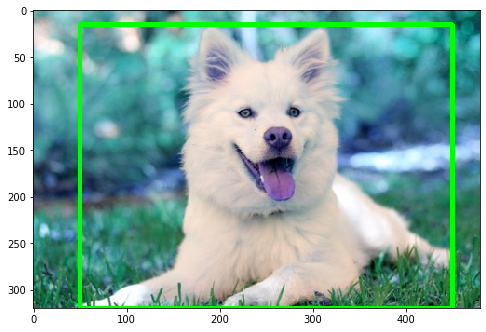

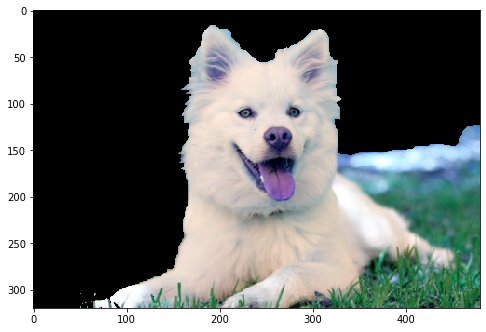

In [310]:
# Apply grab cut with rectangular mask

mask, segment = separate_grab_cut_rect(separate_images_path_list[0], 
                              50, 15, 450, 320, iter_count = 12)

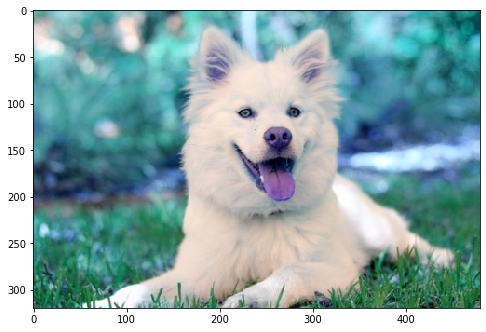

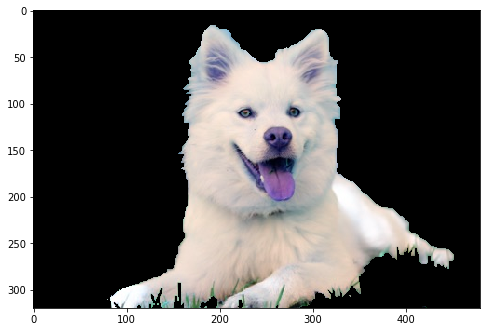

In [317]:
# Improve grab cut results with changed mask

mask_copy = mask.copy()
mask_copy[280:310, 360:440] = 0
mask_copy[310:320, 50:75] = 0
mask_copy[310:320, 100:200] = 2
mask_1, segmented_1 = separate_grab_cut_mask(separate_images_path_list[0], mask_copy, 10)

Not ideal option, but most of the information is preserved and some pixels are false-negatives (grass) and some are false-positive (fur lost).

More detailed tune could remove the grass and preserver more fur.

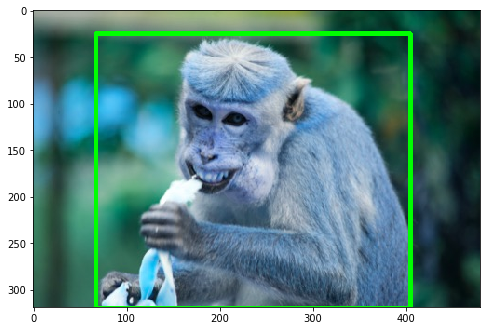

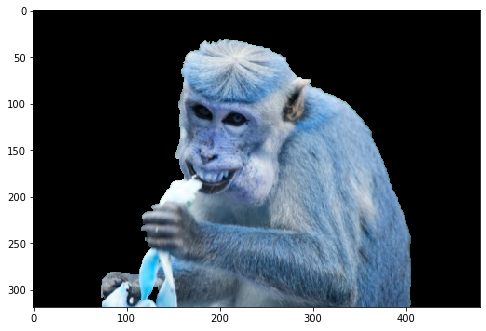

In [335]:
mask, segment = separate_grab_cut_rect(separate_images_path_list[1], 
                              67, 25, 405, 320, iter_count = 3)

In this case the algorithm worked veyr well and most of the information is preserved. Good monkey :)

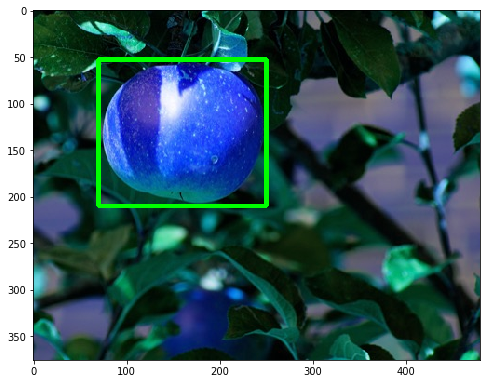

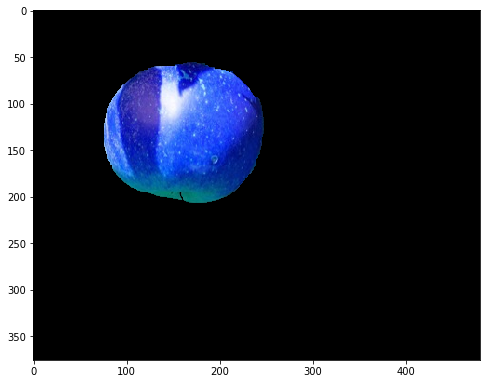

In [337]:
mask, segment = separate_grab_cut_rect(separate_images_path_list[3], 
                              70, 53, 250, 210, iter_count = 5)

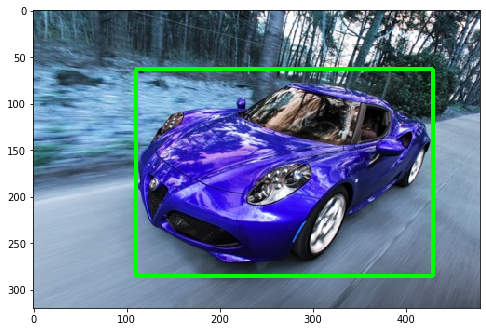

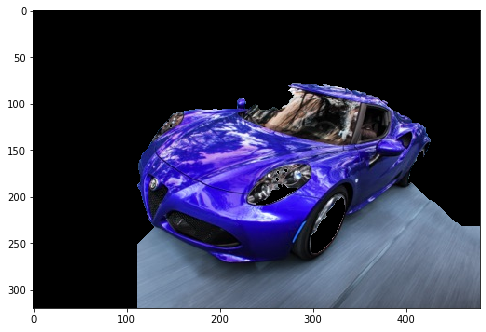

In [345]:
mask, segment = separate_grab_cut_rect(separate_images_path_list[4], 
                              110, 63, 429, 285, iter_count = 10)

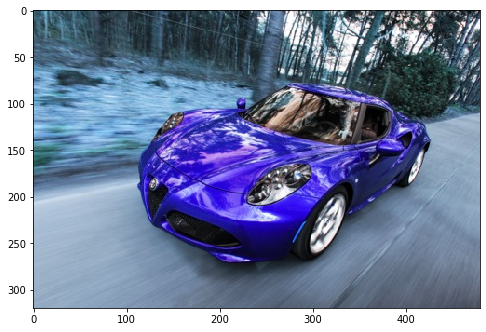

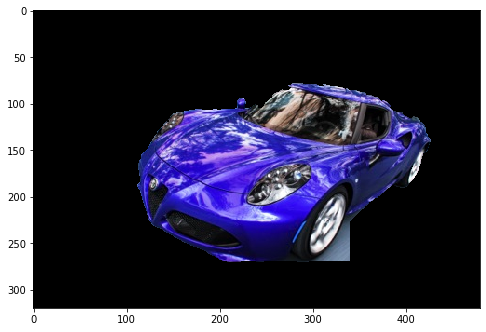

In [405]:
# Improve grab cut results with changed mask

mask_copy = mask.copy()
mask_copy[105:250, 217:290] = 1
mask_copy[200:270, 270:340] = 1
mask_copy[95:110, 260:280] = 1
mask_copy[300:330, 110:480] = 0

#show_image(mask_copy)
mask_1, segmented_1 = separate_grab_cut_mask(separate_images_path_list[4], mask_copy, 10)

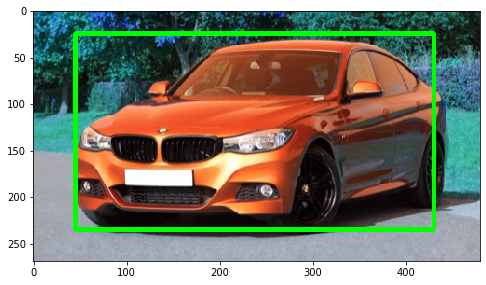

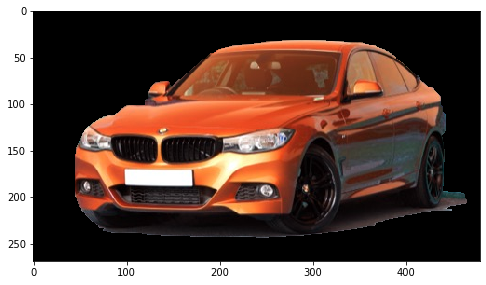

In [259]:
mask, segment = separate_grab_cut_rect(separate_images_path_list[5], 
                              45, 25, 430, 235, iter_count = 10)